# Gradient Descent
* gradient descent is an optimization technique

### there are 3 types of gradient descent
* Batch GD
* stochastic GD (SGD)
* mini-Batch GD

* batch GD ( after complete rows one single update)
* SGD ( jitne rows utne updates)
* mini-Batch GD ( deciding a batch size)

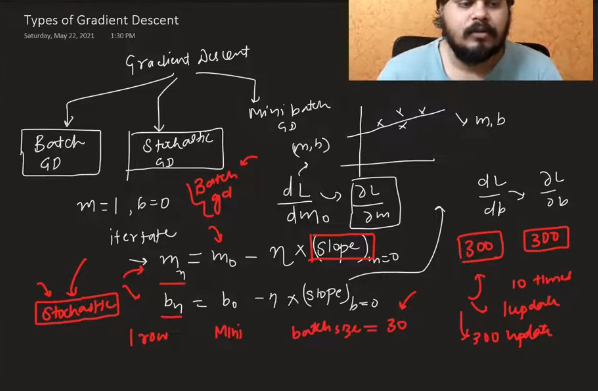

* note:- till know what we have learned was batch gradient descent 
that is rarely used for 2d data that is not large in size and is convex in nature...

# now to use gradient descent for multiple variable (n dimensional dataset)

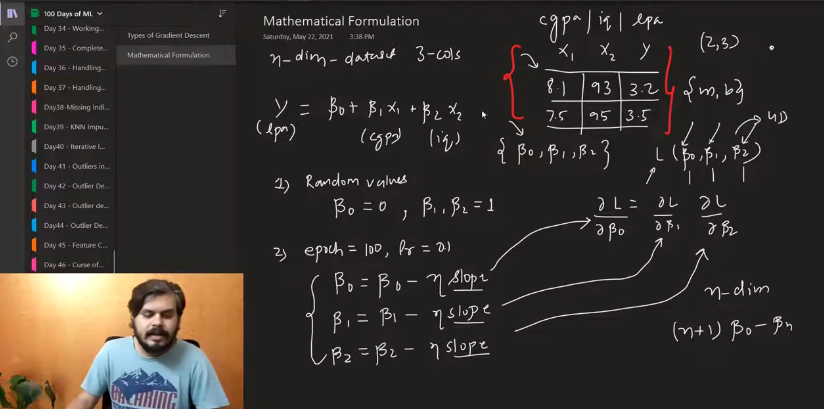

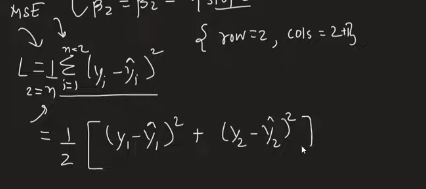

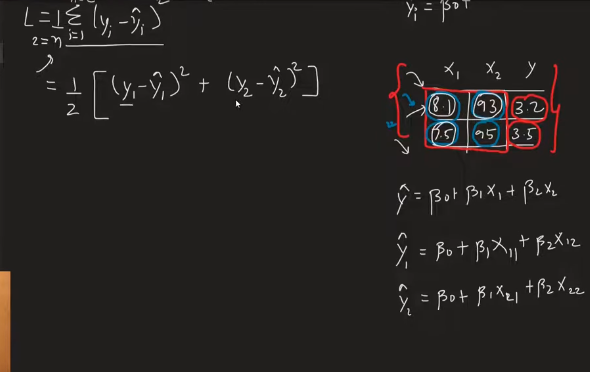

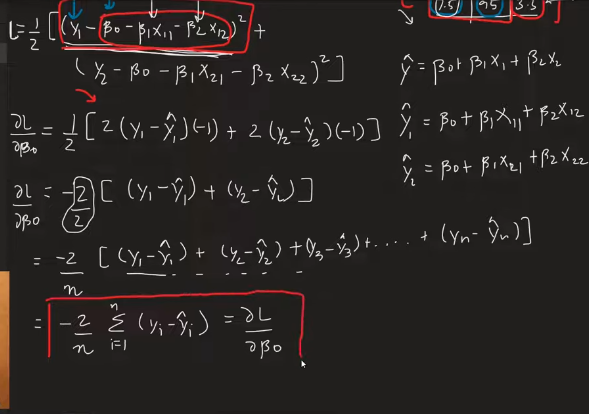

### this is just the slop for b0 (beta 0) similarly we need to calculate the slope of b1, b2 and till bn

### for b1 
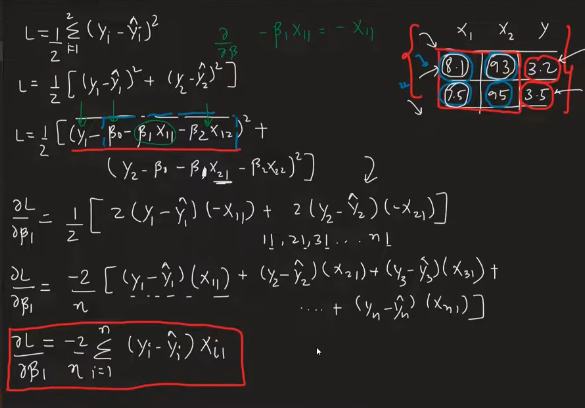

* the xi1 represent the beta value of the first column x1
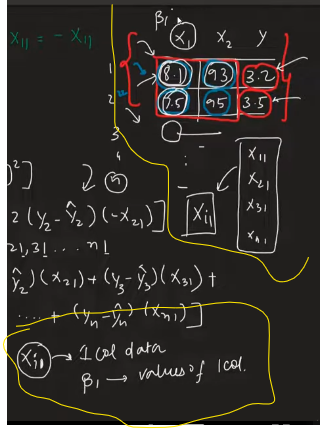

## General equation for mth column and n rows
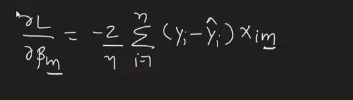

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y = True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [7]:
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.4399338661568968

In [14]:
class GDRegression:

    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):

        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            #update all the coef and the intercept
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_, self.coef_)
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_     # y_hat for x_test data

In [23]:
gdr = GDRegression(epochs=1009, learning_rate=0.1)

In [28]:
import time

In [29]:
start = time.time()
gdr.fit(X_train, y_train)
print("Time taken is", time.time() - start)

151.9445757102752 [  62.31602125  -24.63241438  263.7861789   193.12714355   39.30118502
    9.85546084 -143.07493285  124.5910515   245.52654616  119.65528453]
Time taken is 0.1797351837158203


In [26]:
y_pred = gdr.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.39791315234113545